## 1. 문제정의(목표)
- KNN 모델 : 유유상종의 개념과 비슷
  - 새로운 데이터가 들어왔을 때, 거리계산을 통해서 가장 가까운 특성의 데이터로 예측하는 모델
- KNN 모델의 이웃의 숫자를 조정(하이퍼파라미터 튜닝) - 일반화가 이루어지는 방향으로 조정

- 붓꽃 데이터를 활용
  - 특성 4개 : 꽃잎의 길이, 꽃잎의 너비, 꽃받침의 길이, 꽃받침의 너비
  - 정답 : 클래스 3개 - 붓꽃의 세가지 품좀 (setosa, versicolor, virginica)

- 목표 : 특성 4개를 통해 붓꽃의 품종을 예측하는 모델

In [ ]:
# 필요한 라이브러리 import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# sklearn에서 지원하는 학습용 iris 데이터셋을 로드
from sklearn.datasets import load_iris

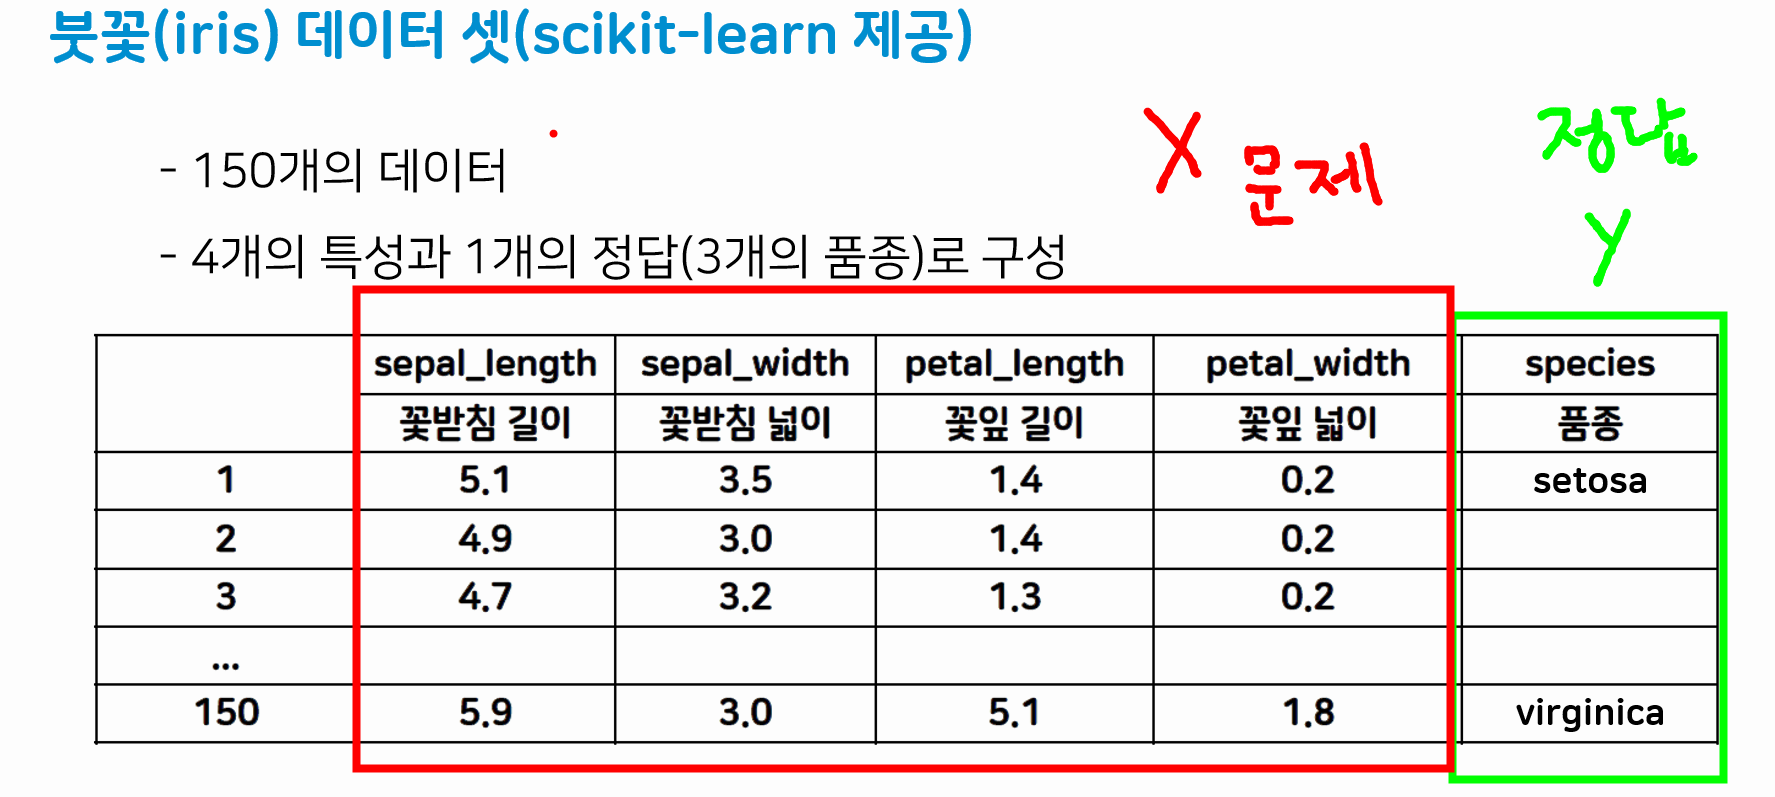

## 2. 데이터 수집
- 학습용으로 제작된 iris 데이터를 로드

In [ ]:
iris_data = load_iris()
iris_data

# 번치 객체 : {} 번치 객체, 파이썬에서 딕셔너리와 굉장히 유사, 머신러닝 데이터셋

# data : 문제 데이터
# target : 정답 데이터
# target_names : 정답 데이터명
# feature_names : 컬럼명
# DESCR : 데이터셋에 대한 설명

In [ ]:
type(iris_data)

## 3. 데이터 전처리
- 학습용 데이터이기 때문에 전처리는 필요없음

## 4. 탐색적 데이터 분석
- 데이터 구조 확인

In [ ]:
# 데이터의 key값, value값 확인
iris_data.keys()

In [ ]:
iris_data.values()

In [ ]:
iris_data['data'] # 문제데이터가 들어있는 key값을 통해 호출
# -> 문제데이터

In [ ]:
iris_data['feature_names']

In [ ]:
iris_data['target']

In [ ]:
iris_data['target_names']

In [ ]:
# 기술통계량
iris_data.describe()

In [ ]:
print(iris_data.DESCR)


In [ ]:
# 문제데이터와 정답데이터의 형태
print(iris_data['data'].shape) # 문제
print(iris_data['target'].shape) # 정답

In [ ]:
iris_df = pd.DataFrame(iris_data['data'], columns = iris_data['feature_names'])
iris_df

문제와 정답 선언

In [ ]:
X = iris_df # 문제데이터
y = iris_data['target']

학습, 평가 데이터로 최종 분리

In [ ]:
y

In [ ]:
# sklearn 내부에 랜덤 샘플링 도구를 불러옴
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() : 자동으로 훈련용과 테스트용 데이터를 나누어주는 도구(랜덤 샘플링)
# train_test_split(문제, 정답, 평가데이터의 비율)

# 순서 중요!
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3, # 테스트 데이터의 비율
                                                    random_state=8 # 랜덤시드 고정
                                                   )

X_train

#### train_test_split 정리
train_test_split() 기능 2가지

1. train, test를 분리
2. random sampling (랜덤 샘플링)

- 랜덤 샘플링이 계속 되면, 학습 데이터가 변경되므로 하이퍼파라미터 조정의 의미가 없어진다.
- 랜덤시드를 고정(수행시마다 동일한 결과를 얻기 위해서)
- 랜덤시드의 숫자 자체는 의미는 없고, 알고리즘 내부적으로 규칙을 가지는 숫자

In [ ]:
# 데이터 크기 확인
print('훈련용 문제 :', X_train.shape)
print('훈련용 정답 :', y_train.shape)
print('테스트용 문제 :', X_test.shape)
print('테스트용 정답 :', y_test.shape)

산점도 매트릭스로 시각화 진행해보기
- x축과 y축에 특성을 넣고 여러개의 산점도를 한번에 출력
- 여러 특성쌍의 관계를 동시에 확인 가능
- 특성의 개수가 너 많다면, 확인하기 힘들어짐 

In [ ]:
# 판다스에서 제공하는 산점도 매트릭스 생성
pd.plotting.scatter_matrix(iris_df,
                           figsize=(12,12), # 매트릭스 사이즈
                           marker='o', # 데이터 표현 형태
                           c = y,
                           alpha = 1
    
)

In [ ]:
plt.figure(figsize=(4,1))

plt.imshow([np.unique(iris_data['target'])])

## 5. 모델링(모델선택, 학습, 평가)

In [ ]:
# 1. 모델 정의
# 2. 모델 학습
# 3. 평가

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=49)

In [ ]:
knn_model.fit(X_train, y_train)

In [ ]:
knn_model.score(X_train, y_train)

In [ ]:
knn_model.score(X_test, y_test)

- 반복문을 활용하여 하이퍼파라미터 튜닝하기

In [ ]:
train_list = [] # train 데이터의 정확도가 들어갈 빈 리스트 정의
test_list = [] # test 데이터의 정확도가 들어갈 빈 리스트 정의

# n_neighborts 1~49
# for, append

for i in range(1,50,1):
    # 모델 정의
    knn_model = KNeighborsClassifier(n_neighbors=i) # 하이퍼파라미터값이 1부터 49까지 들어가도록
    # 모델 학습
    knn_model.fit(X_train, y_train)
    
    # 훈련데이터의 정확도 담기
    train_score = knn_model.score(X_train, y_train)
    train_list.append(train_score)

    # 평가데이터의 정확도 담기
    test_score = knn_model.score(X_test, y_test)
    test_list.append(test_score)

In [ ]:
test_list

In [ ]:
max(test_list)

In [ ]:
# 그래프를 그려서 확인해보자
# 각각의 하이퍼파라미터에 따른 훈련데이터의 정확도, 테스트데이터의 정확도를 그려서
# 일반화가 되고있는 지점(하이퍼파라미터 값)을 찾아보자

plt.figure(figsize=(13,5))
plt.plot(range(1,50,1), train_list, label = 'train_acc')
# range(1,50,1) : x축값들
# train_list : y축값들
# label : 범례에 표시될 텍스트

plt.plot(range(1,50,1), test_list, label = 'test_acc')

plt.legend() # 범례
plt.grid()

plt.xticks(range(1,50)) # 눈금선의 간격 설정
plt.show()

In [ ]:
# 모델 복잡도 곡선을 확인해본 결과, 하이퍼파라미터가 7,8,10일때,
# test데이터의 정확도가 제일 높은걸 확인할 수 있다.

# k=8 or k =10
# test정확도 > train정확도
# 신뢰성이 떨어지는 정확도

# k=7 test와 train의 정확도가 둘 다 높음. 차이 미비
# 모델을 생성 했을때, 현재 우리가 진행한 랜덤 샘플링된 데이터의 가장 적합한 하이퍼파라미터는 7이다.